In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

In [2]:
initial = np.array([
0.333, 0.56, 0.463, 0.362, 0.365, 0.389, 0.488, 0.43, 0.512, 0.285, 0.385
])

rebound = np.array([
0.154, 0.25, 0.209, 0.173, 0.17, 0.182, 0.229, 0.197, 0.237, 0.132, 0.171
])

initial_sqrt = np.sqrt(initial)
rebound_sqrt = np.sqrt(rebound)
x = initial_sqrt
y = rebound_sqrt

corr, _ = pearsonr(x, y)

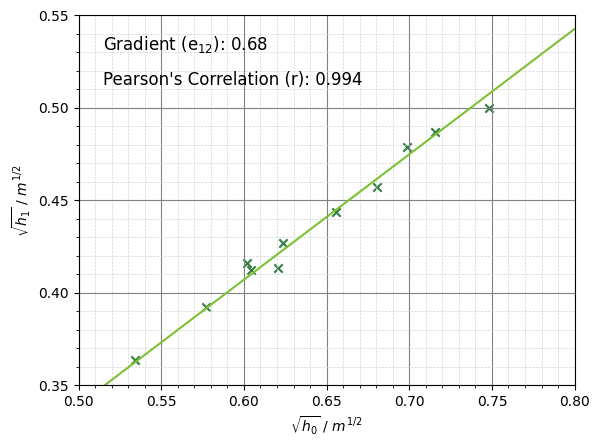

<Figure size 3840x2880 with 0 Axes>

In [3]:
cross_colour = '#317d44'
line_colour = '#7bc133'
plt.scatter(x, y, marker ='x', color=cross_colour)

plt.xlabel(r'$\sqrt{h_0}$ / $m^{1/2}$')
plt.ylabel(r'$\sqrt{h_1}$ / $m^{1/2}$')
# plt.title(r'$\sqrt{h_1}$ against $\sqrt{h_0}$ for the tennis ball dropped onto the football')

# Calculate the slope of the trendline passing through the origin
slope = np.sum(x * y) / np.sum(x * x)

# Generate trendline values
trendline_x = np.linspace(0, 1, 100)
trendline_y = slope * trendline_x

# Plot the trendline
plt.plot(trendline_x, trendline_y, color=line_colour)
plt.text(0.05, 0.95, f'Gradient (e$_{{12}}$): {round(slope, 2)}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f'Pearson\'s Correlation (r): {round(corr, 3)}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Set the scale of both axes to be from 0 to 1
plt.ylim(0.35, 0.55)
plt.xlim(0.5, 0.8)

x_tick_positions = np.arange(0.5, 0.8, 0.05)  # From 0.65 to 1.1 with step 0.05
plt.xticks(x_tick_positions)

y_tick_positions = np.arange(0.35, 0.55, 0.05)  # From 0.65 to 1.1 with step 0.05
plt.yticks(y_tick_positions)

# Add gridlines
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.8)  # Major gridlines
plt.minorticks_on()  # Enable minor ticks
plt.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.5)  # Minor gridlines

# Minor ticks will automatically appear halfway between major ticks

plt.figure(dpi=600)
plt.show()